__Assignment - Week 7__

__Name__: Runze Li

__net id__: rl50xx

We apply the Scikit Learn AdaBoost Classifier code to the dataset for classifying phishing vs benign using and all feature at once.

First, we use a Decision Tree Classifier at your base classifier and we apply the decision trees of varying depths(1,3,6,9,12,15,18 for both gini and entropy criterion) for the base classifier. 

Second, we compare the results with those we obtained last week (Week 5 assignment). Here is the table which summarizes the results:

|Depth|Gini (with ABC*)|Entropy (with ABC)|Gini (without ABC)|Entropy (without ABC)|
|:--:|:--:|:--:|:--:|:--:|
|1|0.6054|0.6389|0.3882|0.4047|
|3|0.7774|0.6860|0.6281|0.6707|
|6|0.9452|0.9491|0.8166|0.8475|
|9|0.9715|0.9720|0.8904|0.9120|
|12|0.9752|0.9752|0.9315|0.9383|
|15|0.9791|0.9770|0.9352|0.9465|
|18|0.9760|0.9612|0.9420|0.9465|

According to the comparison of the four curves, we can find that as the depth increases, the accuracy of the classification task continues to increase. When the depth increases to 12, the accuracy improvement is very small or even decreases.

In addition, we found that at the same depth, the accuracy of the model using AdaBoostClassifier is much higher than that of the model without AdaBoostClassifier.

\* ABC represents AdaBoostClassifier

In [1]:
# Imports
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [3]:
# Check for NaN values in DataFrame
nan_values = df.isna().any()
print("Are there NaN values:", nan_values.any())

Are there NaN values: True


In [4]:
df = df.dropna()

In [5]:
print("Number of Samples:", df.shape[0])
print("Number of features:", df.shape[1])

Number of Samples: 18982
Number of features: 80


In [6]:
from collections import Counter
X = df.drop('URL_Type_obf_Type', axis=1)
y = df['URL_Type_obf_Type']
# print(X)
print(Counter(y))

Counter({'spam': 5342, 'malware': 4440, 'phishing': 4014, 'benign': 2709, 'Defacement': 2477})


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_param = {
    'criterion':['gini','entropy'],
    'max_depth':[1,3,6,9,12,15,18],
}
grid = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 9, 12, 15, 18]})

In [10]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9415870925255186
{'criterion': 'entropy', 'max_depth': 18}
DecisionTreeClassifier(criterion='entropy', max_depth=18)


In [11]:
depths = [1, 3, 6, 9, 12, 15, 18]
# criterions = ['gini', 'entropy']

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

gini_accuracy = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='gini')
#     clf = AdaBoostClassifier(base_estimator=tree, n_estimators=50, random_state=8)
    clf = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gini_accuracy.append(accuracy_score(y_test, y_pred))

In [17]:
print('Gini:')
for i in range(len(depths)):
    print("Depth", depths[i], ":", gini_accuracy[i])

Gini:
Depth 1 : 0.6054780089544377
Depth 3 : 0.7774558862259678
Depth 6 : 0.9452199104556228
Depth 9 : 0.9715564919673426
Depth 12 : 0.9752436133789834
Depth 15 : 0.9791941006057414
Depth 18 : 0.976033710824335


In [18]:
entropy_accuracy = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    entropy_accuracy.append(accuracy_score(y_test, y_pred))

In [19]:
print('Entropy:')
for i in range(len(depths)):
    print("Depth", depths[i], ":", entropy_accuracy[i])

Entropy:
Depth 1 : 0.6389254674743219
Depth 3 : 0.6860679483803003
Depth 6 : 0.9491703976823809
Depth 9 : 0.972083223597577
Depth 12 : 0.9752436133789834
Depth 15 : 0.9770871740848038
Depth 18 : 0.9612852251777719


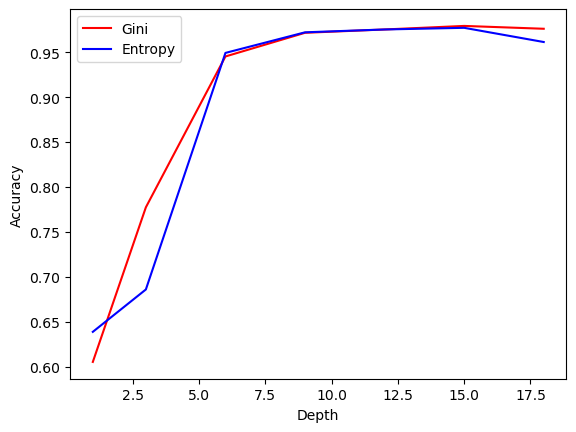

In [23]:
import matplotlib.pyplot as plt

plt.plot(depths, gini_accuracy, label='Gini', color='r')
plt.plot(depths, entropy_accuracy, label='Entropy', color='b')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
gini_accuracy_without_ada = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='gini')
#     clf = AdaBoostClassifier(base_estimator=tree, n_estimators=50, random_state=8)
#     clf = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=8)
#     clf.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    gini_accuracy_without_ada.append(accuracy_score(y_test, y_pred))
    
print('Gini without AdaBoostClassifier:')
for i in range(len(depths)):
    print("Depth", depths[i], ":", gini_accuracy_without_ada[i])

Gini without AdaBoostClassifier:
Depth 1 : 0.38820121148274955
Depth 3 : 0.6281274690545168
Depth 6 : 0.8166973926784303
Depth 9 : 0.8904398209112457
Depth 12 : 0.9315248880695286
Depth 15 : 0.9352120094811693
Depth 18 : 0.9420595206742165


In [27]:
entropy_accuracy_without_ada = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
#     clf = AdaBoostClassifier(base_estimator=tree, n_estimators=50, random_state=8)
#     clf = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=8)
#     clf.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    entropy_accuracy_without_ada.append(accuracy_score(y_test, y_pred))
    
print('Entropy without AdaBoostClassifier:')
for i in range(len(depths)):
    print("Depth", depths[i], ":", entropy_accuracy_without_ada[i])

Entropy without AdaBoostClassifier:
Depth 1 : 0.404793257835133
Depth 3 : 0.6707927311035028
Depth 6 : 0.8475111930471425
Depth 9 : 0.912035817750856
Depth 12 : 0.9383723992625758
Depth 15 : 0.9465367395312089
Depth 18 : 0.9465367395312089


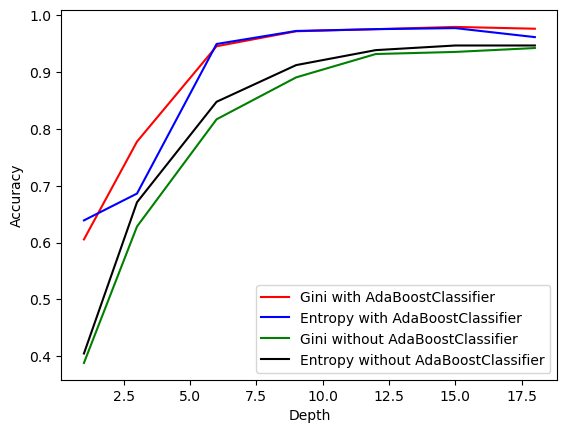

In [28]:
import matplotlib.pyplot as plt

plt.plot(depths, gini_accuracy, label='Gini with AdaBoostClassifier', color='r')
plt.plot(depths, entropy_accuracy, label='Entropy with AdaBoostClassifier', color='b')
plt.plot(depths, gini_accuracy_without_ada, label='Gini without AdaBoostClassifier', color='green')
plt.plot(depths, entropy_accuracy_without_ada, label='Entropy without AdaBoostClassifier', color='black')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

According to the comparison of the four curves, we can find that as the depth increases, the accuracy of the classification task continues to increase. When the depth increases to 12, the accuracy improvement is very small or even decreases.

In addition, we found that at the same depth, the accuracy of the model using AdaBoostClassifier is much higher than that of the model without AdaBoostClassifier.